# t-SNE 範例
* 觀察S曲線使用 t-SNE 不同 perplexity 的流形還原效果

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [16]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

S-Curve, perplexity=30 in 1.8 sec
S-Curve, perplexity=50 in 1.8 sec
S-Curve, perplexity=80 in 1.8 sec
S-Curve, perplexity=100 in 2.3 sec
S-Curve, perplexity=150 in 1.9 sec
S-Curve, perplexity=200 in 2.7 sec
S-Curve, perplexity=250 in 1.8 sec
S-Curve, perplexity=300 in 1.2 sec
S-Curve, perplexity=350 in 1.2 sec


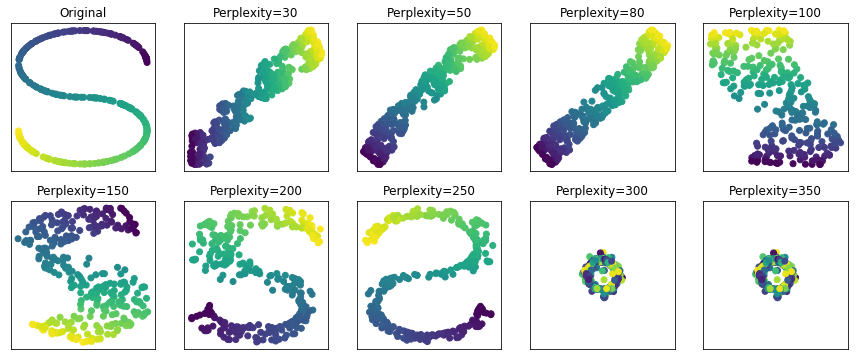

In [17]:
plt.figure(figsize=(15,6))

# 繪製資料原圖
plt.subplot(2,5,1)
plt.title("Original")
plt.scatter(X[:, 0], X[:, 2], c=color)
plt.xticks(())
plt.yticks(())

# 繪製不同 perplexity 下的 t-SNE 分群圖
perplexities = [30, 50, 80, 100, 150, 200, 250, 300, 350]

for i, perplexity in enumerate(perplexities):
    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    
    print("S-Curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
   
    plt.subplot(2,5,i+2)
    plt.title("Perplexity=%d" % perplexity)
    plt.scatter(Y[:, 0], Y[:, 1], c=color)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight');
    
plt.show()